## Iris Dataset Setup

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

df=pd.read_csv('iris_synthetic_data.csv')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#set the seaborn plots 
sns.set() 

In [3]:
# Load the data
df = pd.read_csv("iris_synthetic_data.csv")
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.2,3.8,1.5,0.3,Iris-setosa
1,5.3,4.1,1.5,0.1,Iris-setosa
2,4.8,3.1,1.5,0.2,Iris-setosa
3,5.2,3.7,1.5,0.2,Iris-setosa
4,4.9,3.0,1.5,0.3,Iris-setosa


In [4]:
df.tail()

,sepal length,sepal width,petal length,petal width,label
2995,7.2,3.6,6.0,2.5,Iris-virginica
2996,7.3,3.0,6.2,2.1,Iris-virginica
2997,6.9,3.2,5.7,2.3,Iris-virginica
2998,7.5,2.8,6.0,2.0,Iris-virginica
2999,6.7,3.0,5.3,2.3,Iris-virginica


In [5]:
print(df.keys())
print(df.shape)

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'label'], dtype='object')
(3000, 5)


## The problem
We are trying the callsify the type of flower [Iris-setosa, Iris-versicolor, Iris-virginica]

We got the parameters that will help us: 'sepal length', 'sepal width', 'petal length', 'petal width'


In [6]:
# Statistics 
df.describe()

,sepal length,sepal width,petal length,petal width
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,5.865267,3.051833,3.767367,1.191000
std,0.805073,0.412472,1.751183,0.758022
min,4.300000,2.000000,0.900000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.200000,1.800000
max,7.900000,4.400000,6.900000,2.500000


we can see that we can kind of distingues the ranges of the nim-max of each feature

# Distributions of features and targes

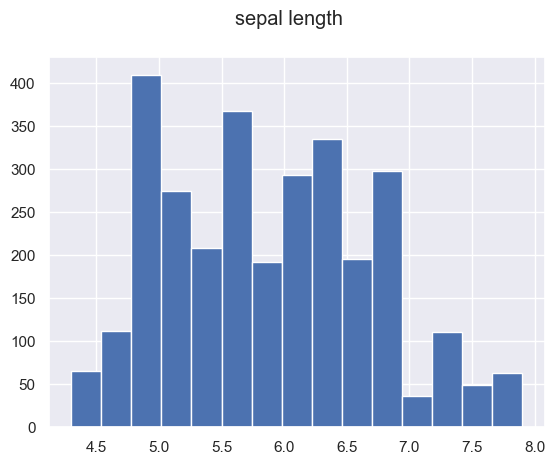

In [7]:
col = 'sepal length'
df[col].hist(bins = 15)
plt.suptitle(col)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'subtitle'

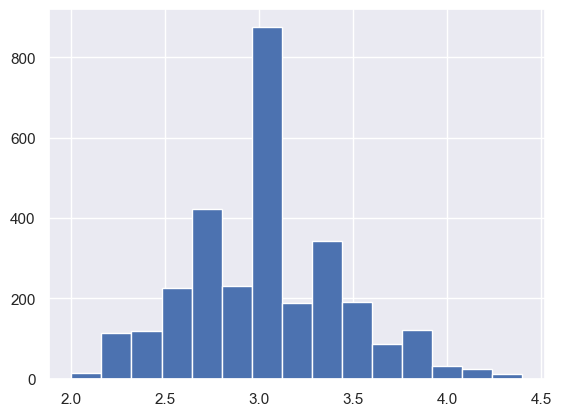

In [8]:
col='sepal width'
df[col].hist(bins=15)
plt.subtitle(col)
plt.show()

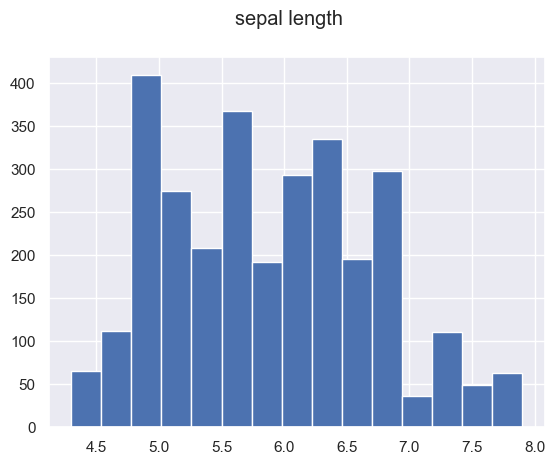

In [9]:
col = 'sepal length'
df[col].hist(bins = 15)
plt.suptitle(col)
plt.show()

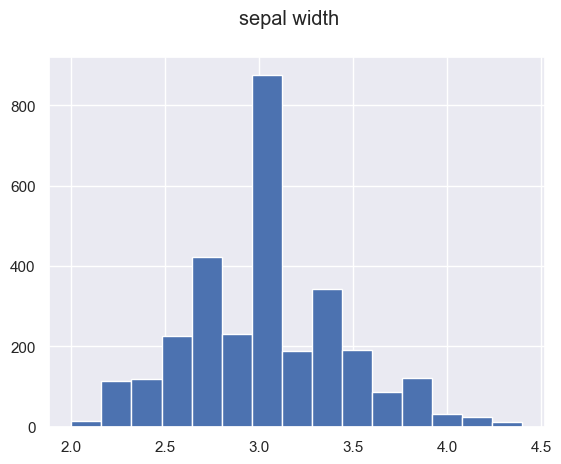

In [10]:
col = 'sepal width'
df[col].hist(bins = 15)
plt.suptitle(col)
plt.show()

# Relationship of the data features withe the targes

In [12]:
df['label'].value_counts()


label
Iris-setosa        1000
Iris-versicolor    1000
Iris-virginica     1000
Name: count, dtype: int64

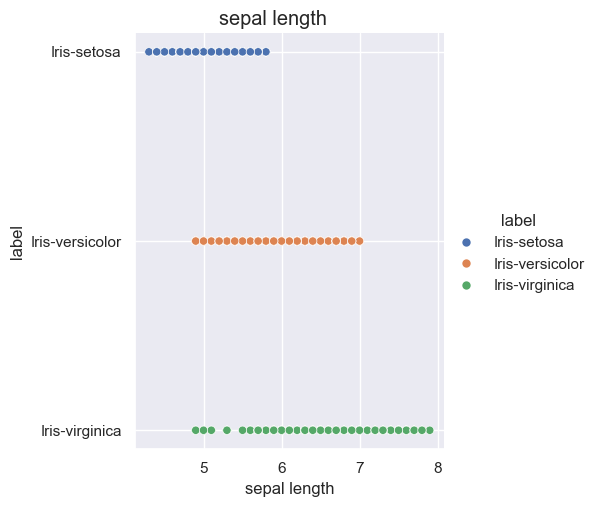

In [14]:
col = 'sepal length'
sns.relplot(x = col, y = 'label', hue = 'label', data=df)
plt.suptitle(col, y = 1.01)
plt.show()

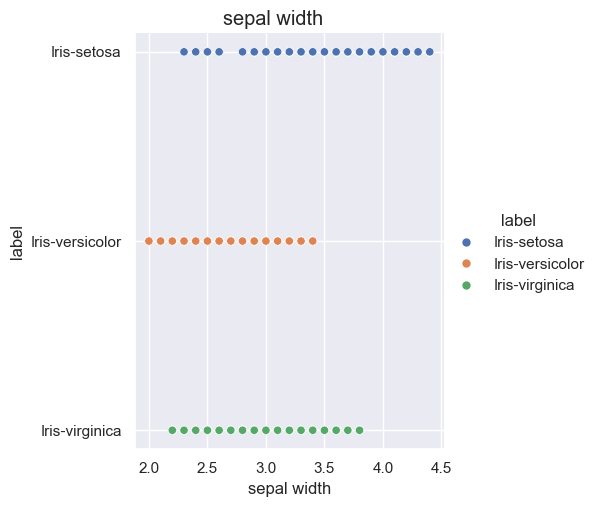

In [15]:
col = 'sepal width'
sns.relplot(x = col, y = 'label', hue = 'label', data=df)
plt.suptitle(col, y = 1.01)
plt.show()

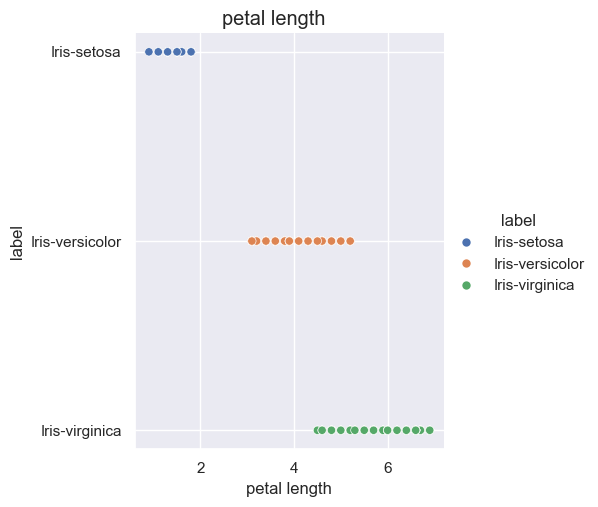

In [16]:
col = 'petal length'
sns.relplot(x = col, y = 'label', hue = 'label', data=df)
plt.suptitle(col, y = 1.01)
plt.show()

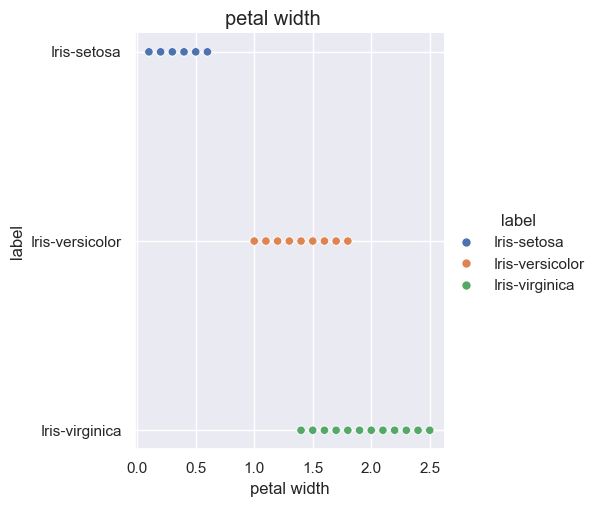

In [17]:
col = 'petal width'
sns.relplot(x = col, y = 'label', hue = 'label', data=df)
plt.suptitle(col, y = 1.01)
plt.show()

we can see from the plots that we can know whether the flower is a setosa easyliy since it has his own range in some of the features

# Exploratory Data Analysis (EDA) - Pairplots

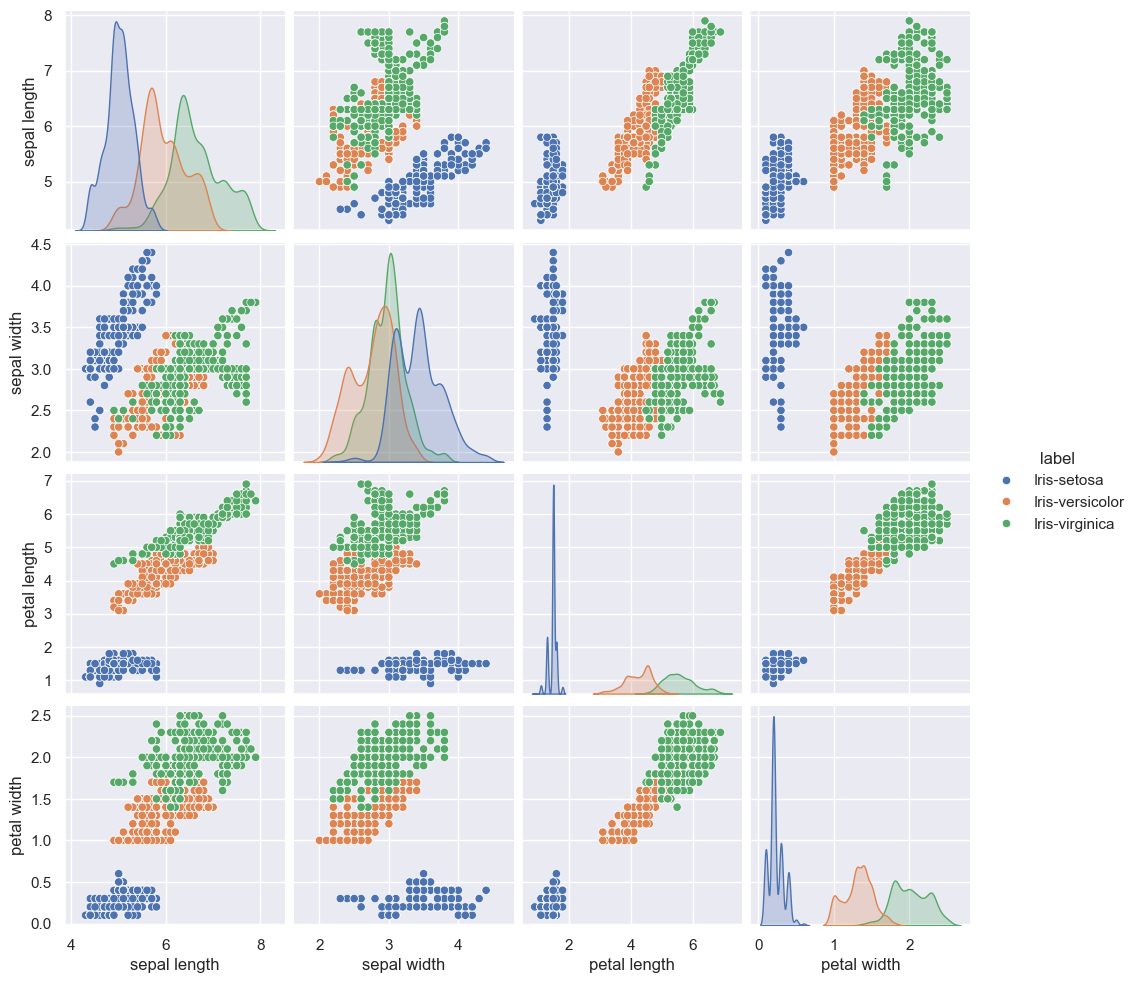

In [18]:
sns.pairplot(df, hue = 'label')

we can see the flowers forming clasters, a good sign!

# Train Test split

In [19]:
df_train, df_test = train_test_split(df, test_size = 0.25)

In [20]:
df_train.shape

(2250, 5)

In [21]:
df_test.shape

(750, 5)

# Prepare our data for medeling

In [22]:
X_train = df_train.drop(columns = "label").values
y_train = df_train["label"].values

X_test = df_test.drop(columns = "label").values
y_test = df_test["label"].values

In [23]:
X_train

array([[6.6, 3.1, 5.7, 2.3],
       [5.4, 3. , 4.5, 1.5],
       [6.7, 3. , 5.2, 2.3],
       ...,
       [6. , 3. , 4.8, 1.8],
       [6.1, 2.2, 4.1, 1. ],
       [5. , 3.4, 1.5, 0.2]], shape=(2250, 4))

In [24]:
y_train

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica', ...,
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'],
      shape=(2250,), dtype=object)

# Modeling - Baseline(Logistic Regression)
we will now run logistic regression to see where we stand with a simple model.

In [25]:
model = LogisticRegression(max_iter = 200)

adding validation to the train set

In [26]:
Xt, Xv, yt, yv = train_test_split(X_train, y_train, test_size = 0.25)

In [27]:
model.fit(Xt, yt)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [28]:
y_pred = model.predict(Xv)
np.mean(y_pred == yv)

np.float64(0.9911190053285968)

In [29]:
model.score(Xv, yv)

0.9911190053285968

# Cross-Validation to evaluate the model 

In [30]:
model = LogisticRegression(max_iter = 200)

In [31]:
accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
np.mean(accuracies)

np.float64(0.9937777777777779)

we can see from the CV score that the model is acctually better than we saw in the lase score 

# Where are we miss calssifying points?

In [32]:
y_pred = cross_val_predict(model, X_train, y_train, cv=5)
predicted_correctly_mask = y_pred == y_train

In [ ]:
# print all the incorect predictions using the mask
X_train[~predicted_correctly_mask]

array([[5.9, 3.2, 4.8, 1.8],
       [6.1, 2.6, 5. , 1.6],
       [5.9, 3.2, 4.8, 1.8],
       [5.9, 3.2, 4.8, 1.8],
       [5.9, 3.2, 4.8, 1.8],
       [6. , 2.7, 5. , 1.6],
       [6. , 2.7, 5.2, 1.6],
       [5.9, 3.2, 4.8, 1.8],
       [5.9, 3.2, 4.8, 1.8],
       [6. , 2.7, 5.2, 1.6],
       [6. , 2.7, 5.2, 1.6],
       [6. , 2.7, 5. , 1.6],
       [5.9, 3.2, 4.8, 1.8],
       [6.1, 2.6, 5. , 1.6]])

In [34]:
df_predictions = df_train.copy()

In [35]:
df_predictions["correct prediction"] = predicted_correctly_mask

In [36]:
df_predictions["prediction"] = y_pred

In [37]:
df_predictions.head()

,sepal length,sepal width,petal length,petal width,label,correct prediction,prediction
2354,6.6,3.1,5.7,2.3,Iris-virginica,True,Iris-virginica
1990,5.4,3.0,4.5,1.5,Iris-versicolor,True,Iris-versicolor
2260,6.7,3.0,5.2,2.3,Iris-virginica,True,Iris-virginica
513,5.2,3.4,1.5,0.2,Iris-setosa,True,Iris-setosa
1902,6.3,3.3,4.6,1.6,Iris-versicolor,True,Iris-versicolor


<Axes: xlabel='petal length', ylabel='petal width'>

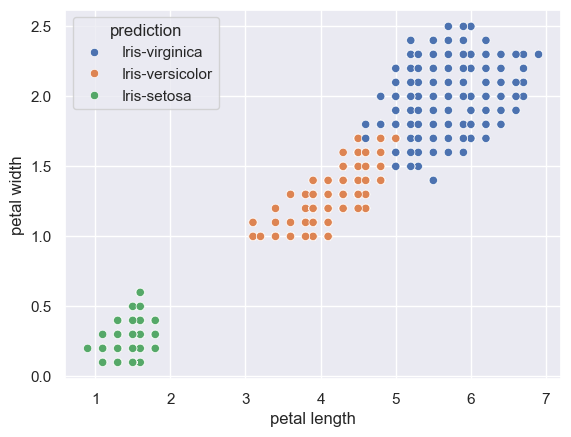

In [38]:
sns.scatterplot(x="petal length", y="petal width", data=df_predictions, hue="prediction")

<Axes: xlabel='petal length', ylabel='petal width'>

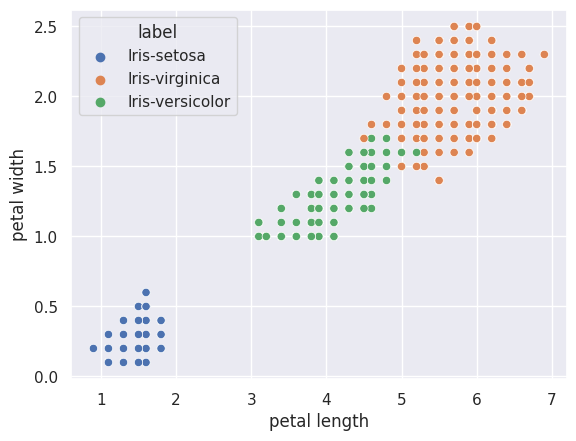

In [36]:
sns.scatterplot(x="petal length", y="petal width", data=df_predictions, hue="label")

we can see the exact point that the model miss predicted

In [39]:
def plot_incorect_predictions(df_predictions, x_axis_feature, y_axis_feature):
    fig, axs = plt.subplots(2, 2, figsize=(10,10))
    axs = axs.flatten()
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="prediction", data=df_predictions, ax=axs[0])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="label", data=df_predictions, ax=axs[1])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="correct prediction", data=df_predictions, ax=axs[2])
    axs[3].set_visible(False)
    

    plt.show()


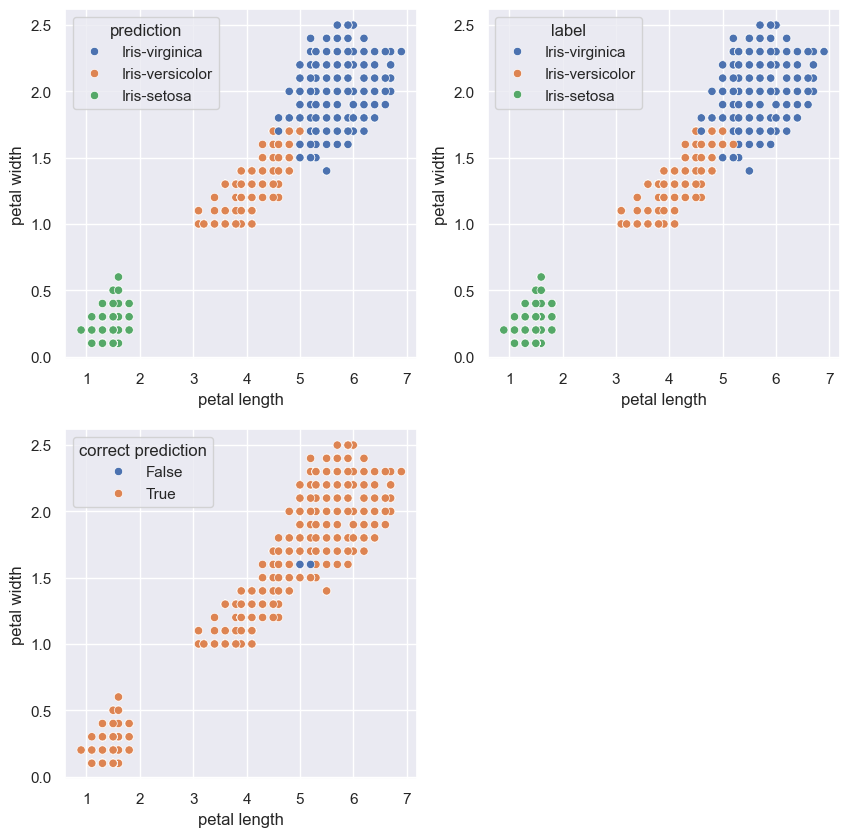

In [40]:
plot_incorect_predictions(df_predictions, "petal length", "petal width")

# Model Turning

In [41]:
for reg_param in (0.1, 0.3, 0.5, 0.8, 1, 1.1, 1.3, 2):
    model = LogisticRegression(max_iter = 200, C=reg_param)
    accuracies =cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    print(f'C = {reg_param}, accuracy = {np.mean(accuracies)*100}')

C = 0.1, accuracy = 98.75555555555555
C = 0.3, accuracy = 99.24444444444444
C = 0.5, accuracy = 99.3777777777778
C = 0.8, accuracy = 99.3777777777778
C = 1, accuracy = 99.3777777777778
C = 1.1, accuracy = 99.3777777777778
C = 1.3, accuracy = 99.3777777777778
C = 2, accuracy = 99.33333333333334


In [42]:
model = LogisticRegression(max_iter = 200, C=0.8)

# How well does the model do on the test set?
Before we do that we need to train the model on the hole training data so we got the most out of it 

In [43]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.8
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [44]:
y_test_pred = model.predict(X_test)

In [45]:
test_set_classified = y_test_pred == y_test
test_set_accuracy = np.mean(test_set_classified)

In [46]:
print(f'Test set accuracy: {test_set_accuracy * 100}%')

Test set accuracy: 99.2%


In [47]:
df_predictions_test = df_test.copy()
df_predictions_test["correct prediction"] = test_set_classified
df_predictions_test["prediction"] = y_test_pred

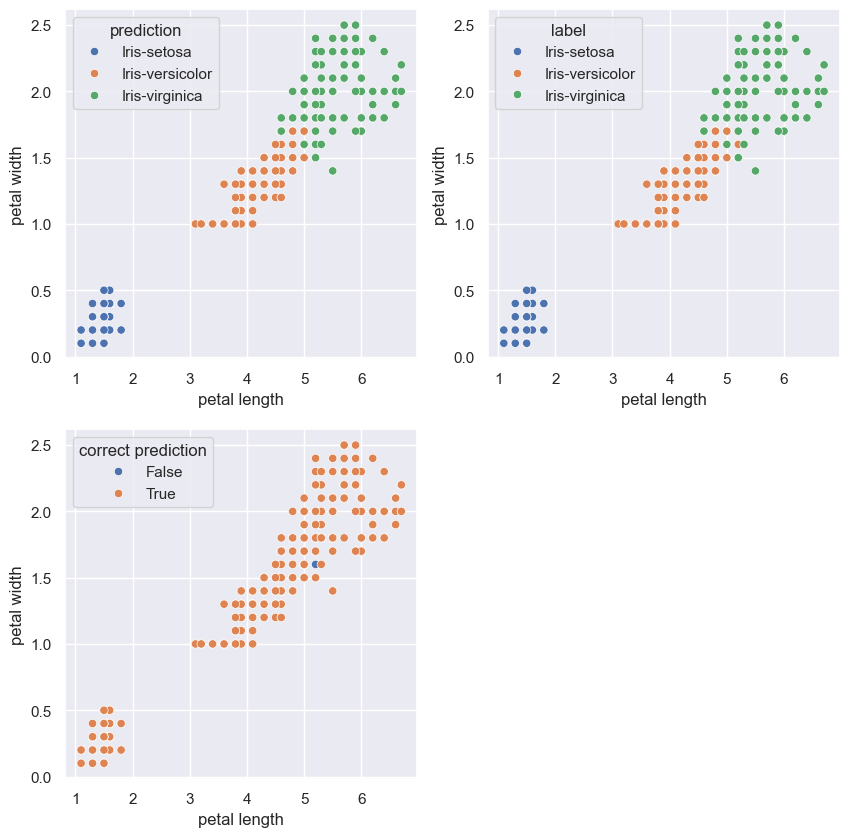

In [48]:
plot_incorect_predictions(df_predictions_test, "petal length", "petal width")